# Implementar un algoritmo de aprendizaje de perceptrón en Python

## Una API perceptrón orientada a objetos


In [2]:
# importaciones de librerias 

import numpy as np

In [3]:
class Perceptron():
    """Perceptron Clasificador.

    Parametros
    ------------
    eta          : float --- Learning rate (between 0.0 and 1.0) (taza de aprendizaje)
    n_iter       : int   --- Passes over the training dataset.   (Nunero de iteraciones o epocas)
    random_state : int   --- Random number generator seed for random weight initialization. (semilla randndom)

    Attributes
    -----------
    w_      : 1d-array  --- Weights after fitting. (pesos de cada entrenamiento)
    errors_ : list      --- Number of misclassifications (updates) in each epoch. (lista de errores de cada epoca)
    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta          = eta
        self.n_iter       = n_iter
        self.random_state = random_state

In [6]:
rgen = np.random.RandomState(1)

In [9]:
rgen.normal(3, 2.5, size=(2, 4))

array([[ 1.47060897,  1.67957062,  0.31757844,  5.16351907],
       [-2.75384674,  7.36202941,  1.09698275,  3.79759774]])

In [29]:
rgen.normal(loc=0.0, scale=0.01, size=1 + 2)

array([-0.01896361, -0.00646917,  0.00901487])

In [11]:
class Perceptron(Perceptron):
    
    def net_input(self, X):
        """Calcula """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where( self.net_input (X) >= 0.0 , 1 , -1 )

    def fit(self,X,y):
        """metodo de entrenamiento

        Args:
            X (array-like): features , shape = [n_samples, n_features]
            y (array-like): targets  , shape = [n_samples]

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update       = self.eta * ( target - self.predict(xi) )
                self.w_[1:] += update * xi
                self.w_[0]  += update
                errors      += int( update != 0.0 )
            self.errors_.append(errors)
        return self


## Entrenando al perceptron con el dataset Iris

### Leemos el dataset

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.sample(15)

,0,1,2,3,4
29,4.7,3.2,1.6,0.2,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df[4].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: 4, dtype: int64

## Vamos a graficar 2 clases del dataset

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [39]:

# seleccionamos setosa y versicolor
y = df.iloc[0:100, 4].values
print(y)
y = np.where(y == 'Iris-setosa', -1,1)
print(y)


['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [40]:
# Extraemos 2 caracteristicas  longitud de los sépalos y de los pétalos
X = df.iloc[0:100, [0, 2]].values

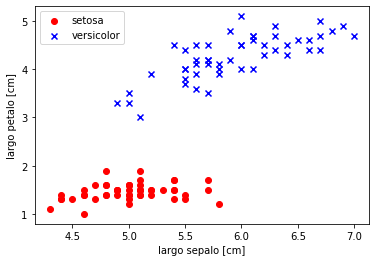

In [41]:

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('largo sepalo [cm]')
plt.ylabel('largo petalo [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

# Entrenamos al perceptron 

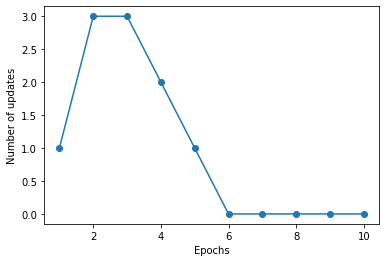

In [42]:

# instaciamos un perseptron con una taza de aprendizaje de 0.1 y 10 epocas
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [71]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict( np.array( [xx1.ravel() , xx2.ravel() ] ).T)
    
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x         = X [y == cl, 0], 
                    y         = X [y == cl, 1],
                    alpha     = 1, 
                    c         = colors[idx],
                    marker    = markers[idx], 
                    label     = cl, 
                    edgecolor = 'black')

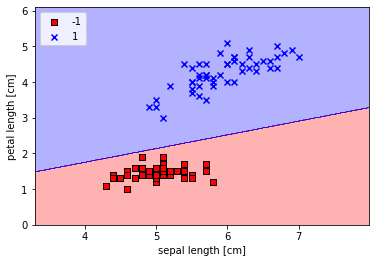

In [72]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()